# Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

Dataset:

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.

2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.

3.	FM - May indicate "Fetal Movements" detected by the monitor.

4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.

5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.

6.	DS - May represent "Decelerations Short" or decelerations of brief duration.

7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.

8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.

9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.

10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.

11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df= pd.read_csv('Cardiotocographic.csv')
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [51]:
df.shape

(2126, 14)

In [52]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


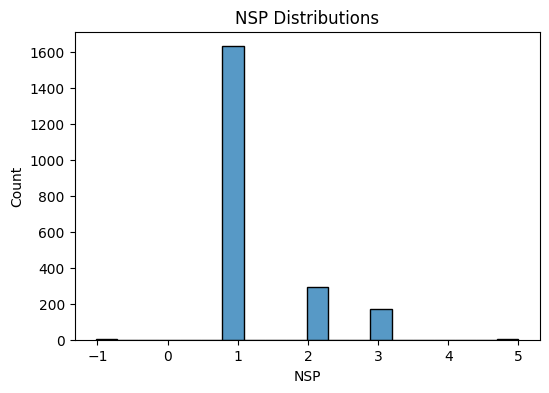

In [53]:
plt.figure(figsize=(6,4))
sns.histplot(df['NSP'],bins=20)
plt.title('NSP Distributions')
plt.show()

here NSP looks like a categorical columns but actually has float values or continuous data. we need to fic this

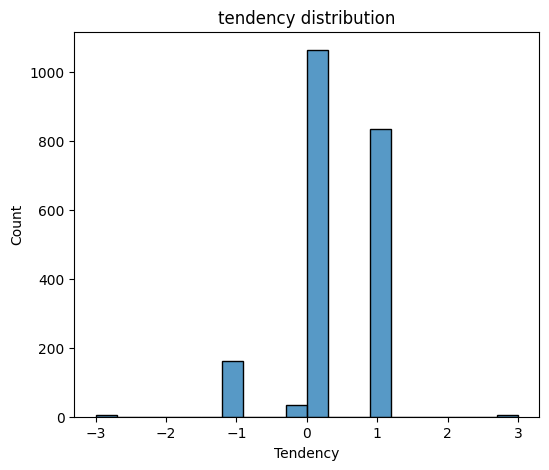

In [54]:
plt.figure(figsize=(6,5))
sns.histplot(df['Tendency'],bins=20)
plt.title('tendency distribution')
plt.show()

tendency values are clustered near -1,0 ,and  1 . so it has to be a categorical column with some incorrect values.

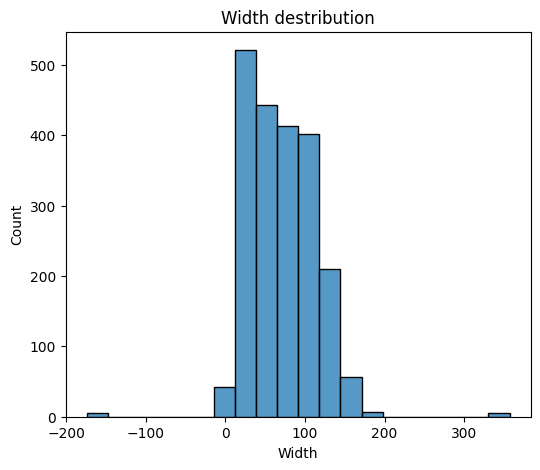

In [55]:
plt.figure(figsize=(6,5))
sns.histplot(df['Width'],bins=20)
plt.title('Width destribution')
plt.show()

This column is hard to understand and interpret since the description is not given in the assignement and it does not provide any relation with other columns.

Conclusion:
    
    NSP:
        we will keep NSP,since without a categorical column patterns have to meaning or reference. we cannot identify any correlation without a categorical column.
    
    tendency:
        this is also an categorical colum based on distribution insights, so it could be usefull later.
    
    width:
        There is no explanation in the data card about this column. adds some cognitive loads without insights.
        

In [56]:
df = df.drop(columns=['Width'],errors ='ignore')

In [57]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,1.000000,3.000000


In [58]:
# rounding the categorical values
df['NSP']= df['NSP'].round()
df['Tendency']=df['Tendency'].round()

In [59]:
nsp_mode = df['NSP'].mode()[0] # 0 means we are taking the first mode incase the mode is similar.
invalid_nsp = (df['NSP']< 1) | (df['NSP']>3)
print(f'inavalid_nsp_entries:{invalid_nsp.sum()}')
df.loc[invalid_nsp,'NSP']= nsp_mode


inavalid_nsp_entries:10


In [60]:
tendency_mode = df['Tendency'].mode()[0] # 0 means we are taking the first mode incase the mode is similar.
invalid_tendency = (df['Tendency']< -1) | (df['Tendency']>1)
print(f'inavalid_tendency_entries:{invalid_tendency.sum()}')
df.loc[invalid_tendency,'Tendency']= tendency_mode

inavalid_tendency_entries:10


In [61]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,1.0,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,0.0,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,0.0,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,1.0,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,1.0,1.0


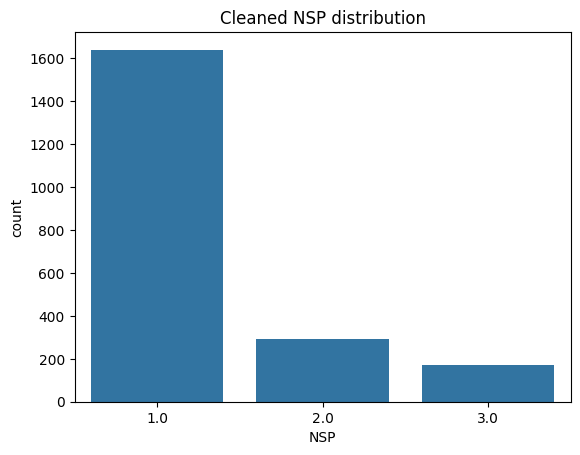

In [62]:
sns.countplot(x=df['NSP'])
plt.title('Cleaned NSP distribution')
plt.show()

In [63]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Tendency    21
NSP         21
dtype: int64

there are some null values in the dataset so we should use imputation techniques

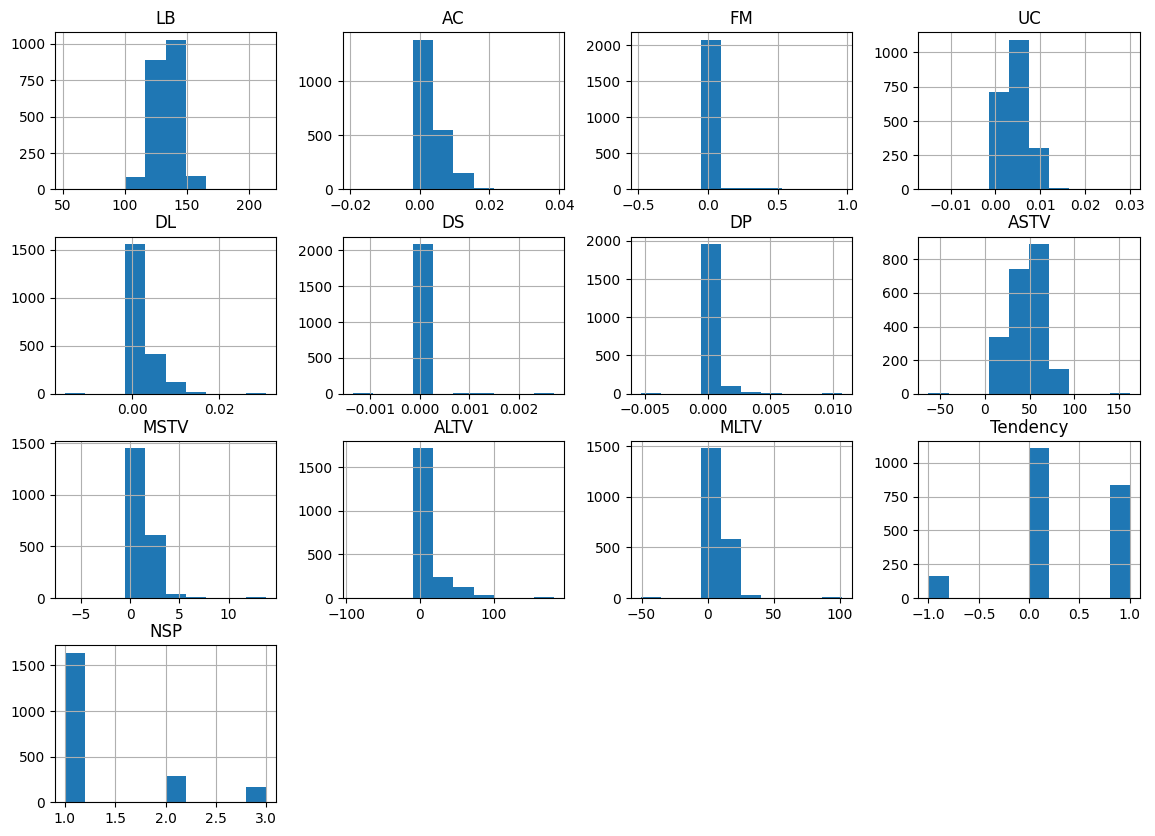

In [64]:
df.hist(figsize=(14,10))
plt.show()

There is some skewness in the data and there are also outliers present. If outliers are peresent we cannot use mean cause it would just give wrong result so median is the best choice.

In [65]:
numerical_cols=df.select_dtypes(include=['float64','int64']).columns
numerical_cols = numerical_cols.drop(['NSP','Tendency'])

for col in numerical_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [66]:
numerical_cols

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV'],
      dtype='object')

In [67]:
#filling th eempty values in categorical columns with first mode 
df['NSP'].fillna(df['NSP'].mode()[0],inplace=True)
df['Tendency'].fillna(df['Tendency'].mode()[0], inplace=True)

In [68]:
#converting the float values to integer
df['NSP']=df['NSP'].astype(int)
df['Tendency']= df['Tendency'].astype(int)

In [69]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Tendency  2126 non-null   int32  
 12  NSP       2126 non-null   int32  
dtypes: float64(11), int32(2)
memory usage: 199.4 KB


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Tendency    0
NSP         0
dtype: int64

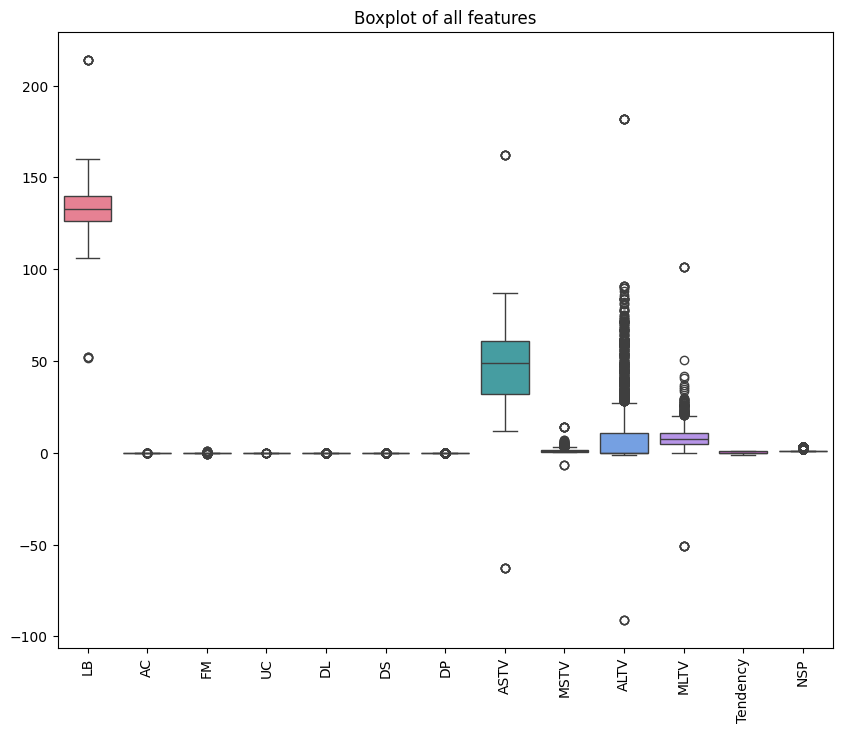

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of all features')
plt.show()

LB:(baseline fatal rate):
    ranges between 110-160. the outside values can be rare but important in medical field. it has some meaning in medical data like extreame high or low can be error or distress.
    
AC,FM,UC,DL,DS,DP: have many zeros but higher values may indicate critical situation,so keeping them would be better although mathematically outliers.

ASTV,ALTV(percentage values):
    higher values may indicate some abnormalities.so here also outliers are signals,not noise.
  
MSTV,MLTV(mean variability):
    the mean can show spread and higher values or outliers may matter clinically.we cannot remove the higher values due to importance of each value.

In [71]:
outlier_summary = {}
for col in numerical_cols:
    
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR= Q3 -Q1

    lower = Q1- 1.5 * IQR
    upper = Q3+ 1.5 * IQR
    
    outliers = (df[col]<lower) | (df[col]> upper)
    outlier_summary[col] = outliers.sum()
    
    
outlier_summary

{'LB': 10,
 'AC': 43,
 'FM': 347,
 'UC': 13,
 'DL': 125,
 'DS': 120,
 'DP': 284,
 'ASTV': 10,
 'MSTV': 80,
 'ALTV': 318,
 'MLTV': 81}

These outliers could be medical emergencies or high risk cases, so deleting them might be risky which will create a bias.

we identified outliers with boxplot and IQR method. given the medical nature of the data,extreme values were kept as it is, as they may have some clinically important meanings rather than mathematical outliers. Therefore we did not performed any outlier removal or transformation.

# Statistical summary

In [72]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,0.316087,1.299624
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,0.608021,0.609779
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,1.000000,3.000000


In [73]:
skewness= df[numerical_cols].skew()
print(skewness)

LB      0.323245
AC      2.032396
FM      6.753070
UC      0.974239
DL      2.010390
DS      8.461304
DP      6.456342
ASTV    0.055872
MSTV    4.142518
ALTV    2.981199
MLTV    3.561739
dtype: float64


In [74]:
df['NSP'].value_counts()


NSP
1    1661
2     293
3     172
Name: count, dtype: int64

The classes are imbalance, there are more normal than pathological in this data.

In [75]:
df['Tendency'].value_counts()

Tendency
 0    1128
 1     835
-1     163
Name: count, dtype: int64

tendency may be centered arround 0.

Observation from statistics:

the summary shows that the baseline heart rates are stable in most cases, while AC,FM,UC may exhibit strong right skewes distribution. sevaral variables may show the large distance between the median and mode. which supports our median based imputation. some varable have median of 0 and some higher values which may indicate the clinically important situations rather than the errors.

# visualization

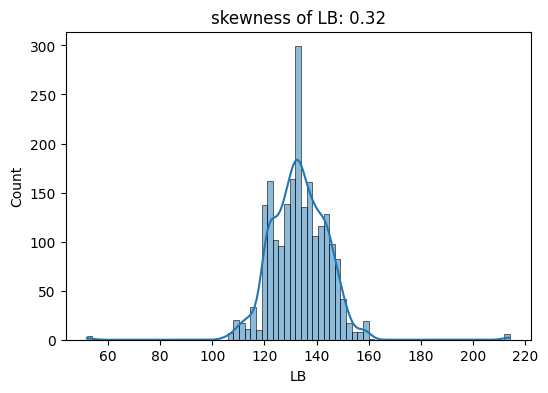

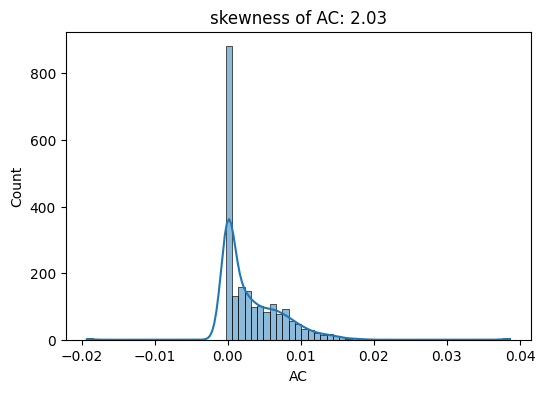

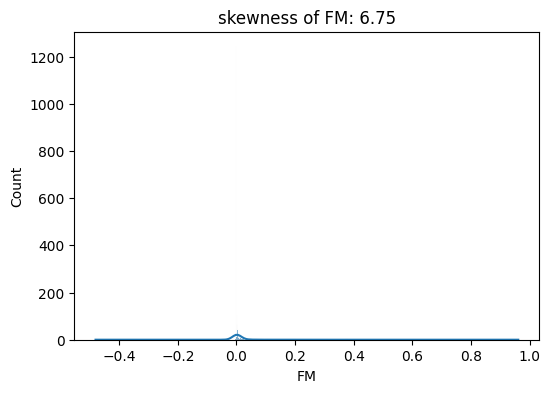

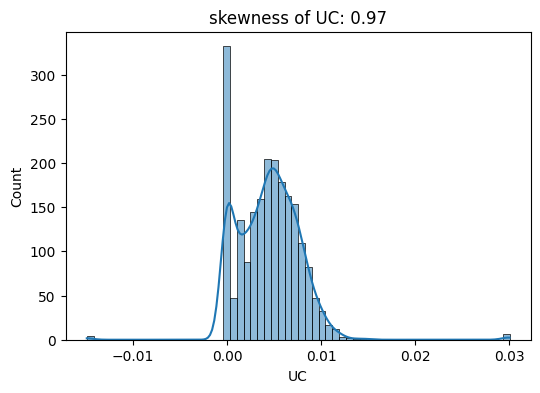

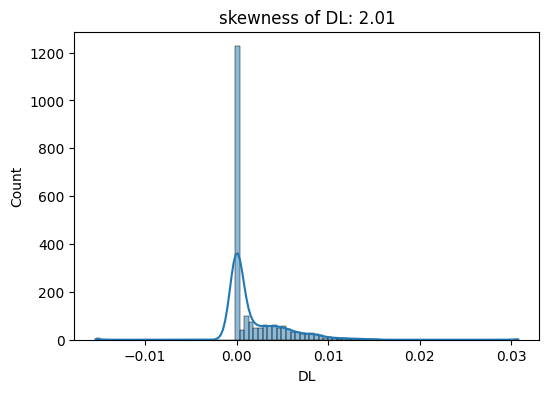

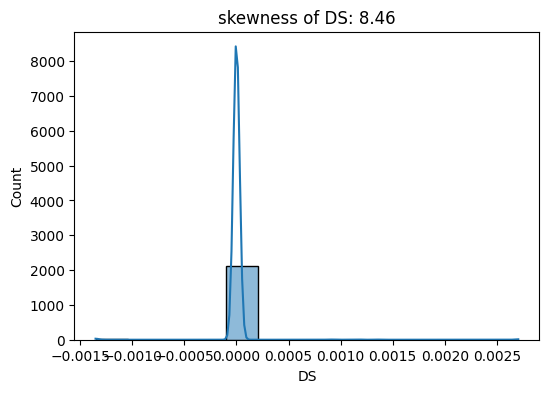

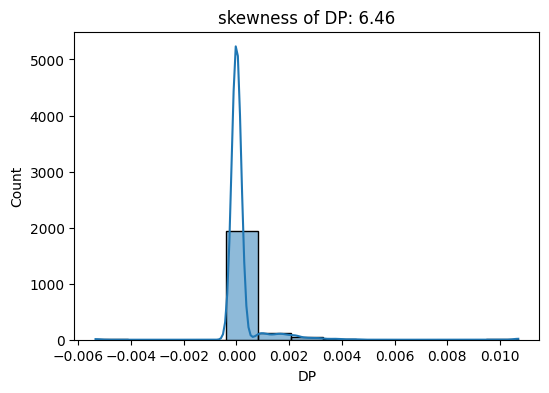

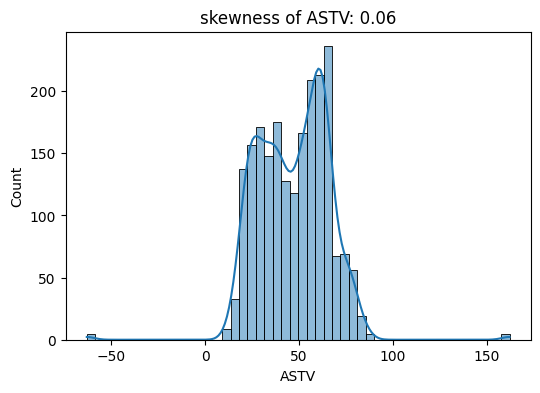

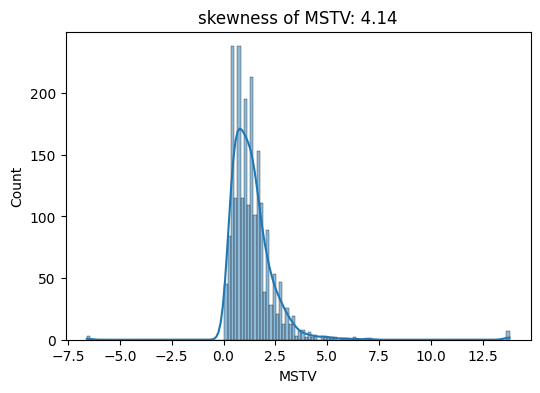

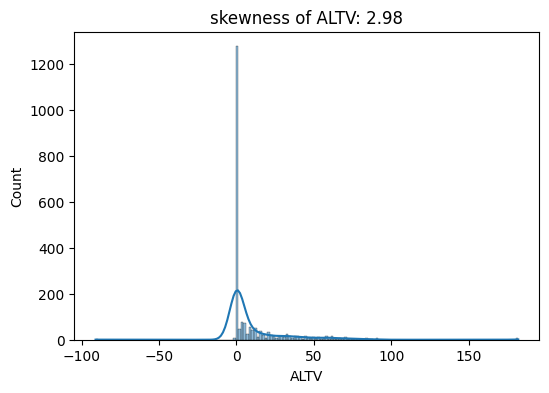

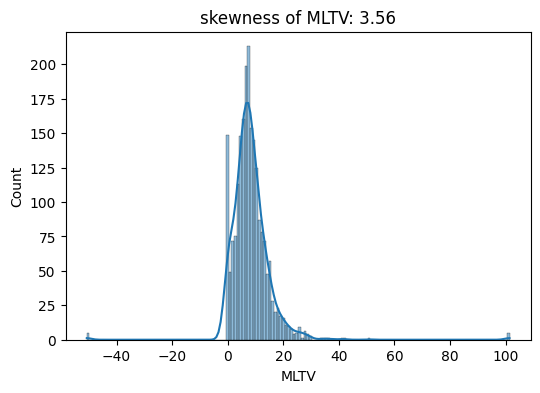

In [76]:
# plotting the skewness
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f'skewness of {col}: {skewness[col]:.2f}')
    plt.show()

Observation:

LB: the mean is around 130 to 140 and the data is almost symmetrical, median is close to the mean. Lb does not show extreme dispersion in the data while there are some abnormal cases.

AC,FM,UC:  mean> median which means it is a right skewed distribution. Min is 0 .there are many observations which are 0 and lower counts. very few cases with high activity. higher values are not errors in this data ,it may indicate increased fetal activities.

DL,DS,DP: median here is 0 for most cases. mean is very small. it shows strong skewness. these could be due to rare events, so presence of non zero's could be clinically important.we can interpret them as critical signals here.

ASTV ,ALTV : in here mean is some cases is higher than the median,shows right skewness, high variance maybe indicating distress. and has very wide spread of the data.

MSTV,MLTV:  shows more continous distribution and less extreme skew.

In [77]:
corr_cols = ["LB","AC","FM","UC","DL","DS","DP","ASTV","MSTV","ALTV","MLTV","NSP"]
corr_df = df[corr_cols]

In [78]:
corr_matrix = corr_df.corr(method='pearson')

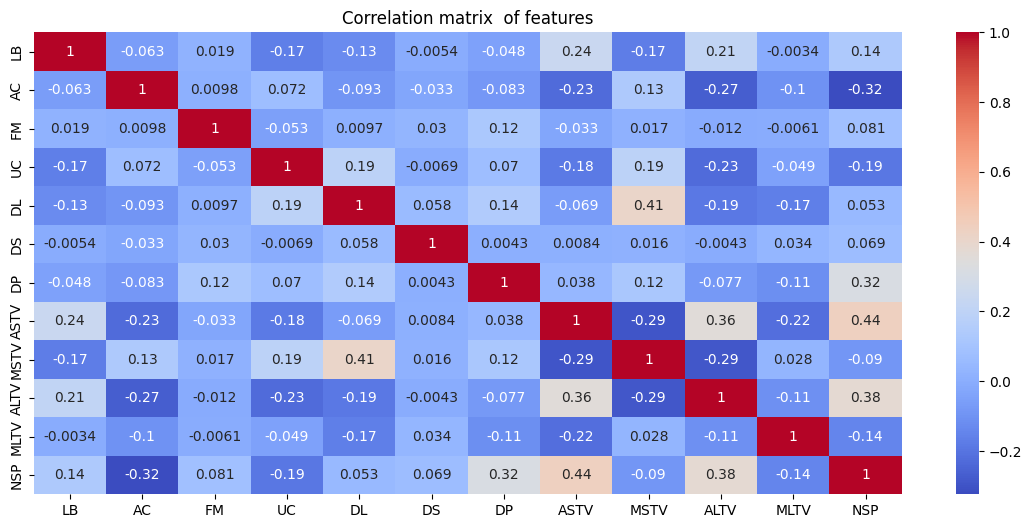

In [79]:
plt.figure(figsize=(14,6))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.title("Correlation matrix  of features")
plt.show()

In [80]:
threshold = 0.3 # excluding weaker correlations

corr_pairs = corr_matrix.abs().unstack()
strong_pairs = corr_pairs[(corr_pairs>threshold) & (corr_pairs<1.0)]

strong_pairs = strong_pairs.sort_values(ascending=False).drop_duplicates() #dropping the duplicate values while sorted

print(strong_pairs)

ASTV  NSP     0.438498
DL    MSTV    0.410102
ALTV  NSP     0.378734
ASTV  ALTV    0.357497
AC    NSP     0.323889
DP    NSP     0.316698
dtype: float64


above correlations of pairs have the strongest correlation scores among all. The pearson corr heatmap was used to explore linear relationships among numerical features. strong correlations were obsereved between the above pairs with the threshold of 0.3.  these are the potentially related features.

# Pattern recognition and insights

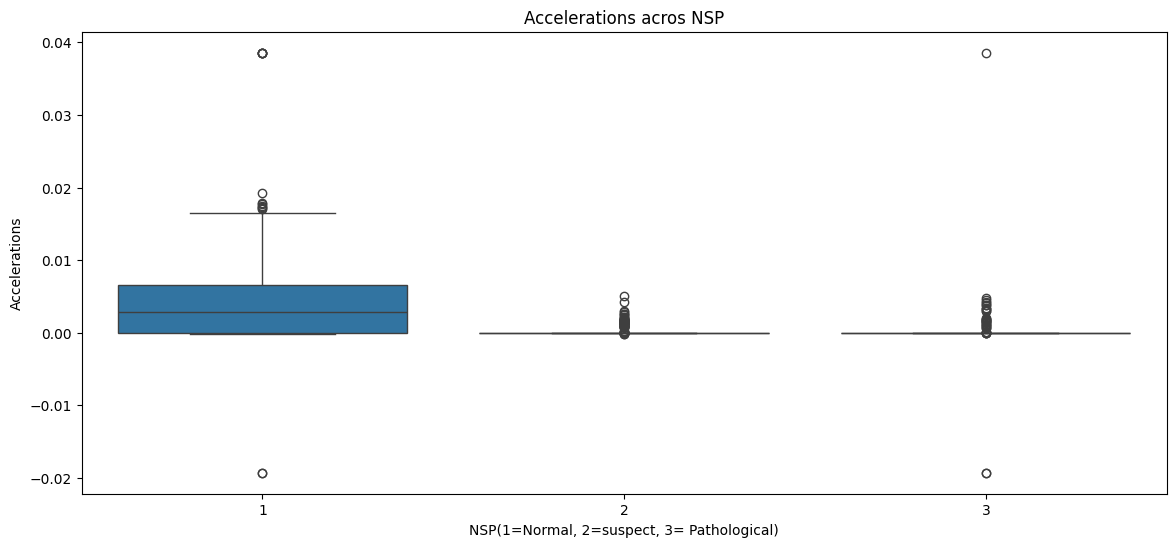

In [81]:
plt.figure(figsize=(14,6))
sns.boxplot(x='NSP',y='AC',data=df)
plt.title('Accelerations acros NSP')
plt.xlabel('NSP(1=Normal, 2=suspect, 3= Pathological)')
plt.ylabel('Accelerations')
plt.show()

normal fetuses shows higher accelerations,suspect and pathological shows zero acccelerations. here the meaning of reduced accelrations can be that these are accociated with abonormal cases such as pathological or suspect.

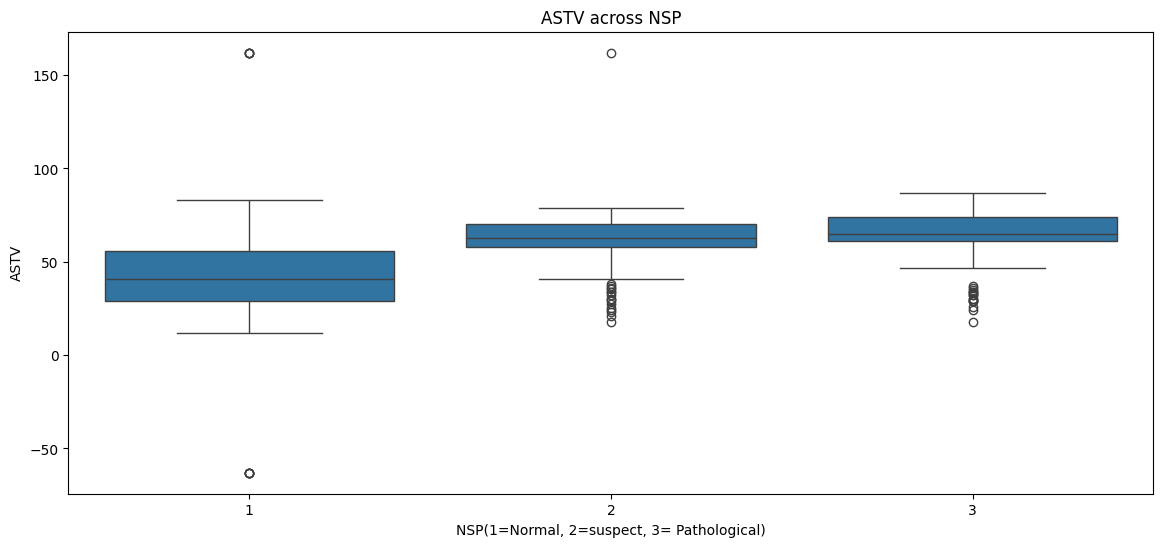

In [82]:
plt.figure(figsize=(14,6))
sns.boxplot(x='NSP',y='ASTV',data=df)
plt.title('ASTV across NSP')
plt.xlabel('NSP(1=Normal, 2=suspect, 3= Pathological)')
plt.ylabel('ASTV')
plt.show()

ASTV is increasing across the NSP states  from 1 to 3. suspects and pathological fetuses shows abnormal short term variability which can indicate unstable heart rate

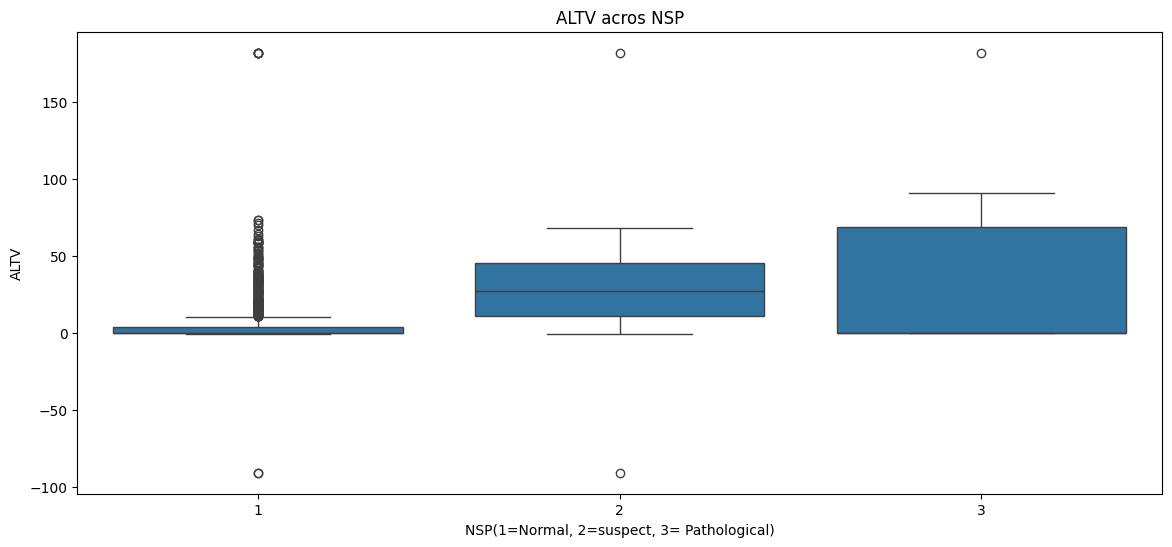

In [83]:
plt.figure(figsize=(14,6))
sns.boxplot(x='NSP',y='ALTV',data=df)
plt.title('ALTV acros NSP')
plt.xlabel('NSP(1=Normal, 2=suspect, 3= Pathological)')
plt.ylabel('ALTV')
plt.show()

similar to the ASTV when the long term variability is abnormal the baby is more likely to be in pathological state

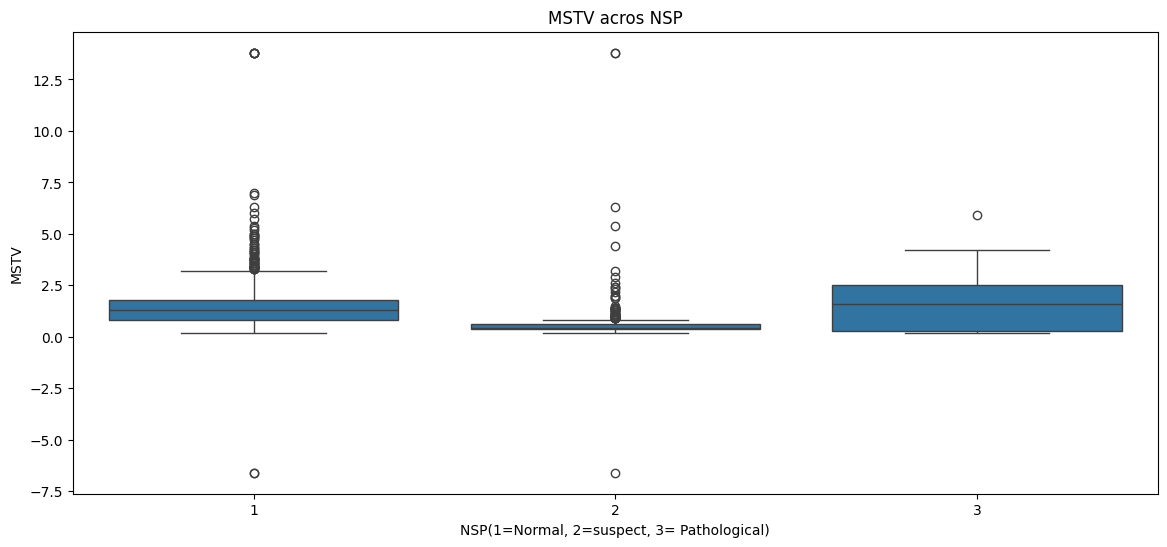

In [84]:
plt.figure(figsize=(14,6))
sns.boxplot(x='NSP',y='MSTV',data=df)
plt.title('MSTV acros NSP')
plt.xlabel('NSP(1=Normal, 2=suspect, 3= Pathological)')
plt.ylabel('MSTV')
plt.show()

while normal MSTV shows moderate short term variability , suspect cases shows suppresed or reduced variability, also the pathological ones  hsows inceased dispersion in MSTV.

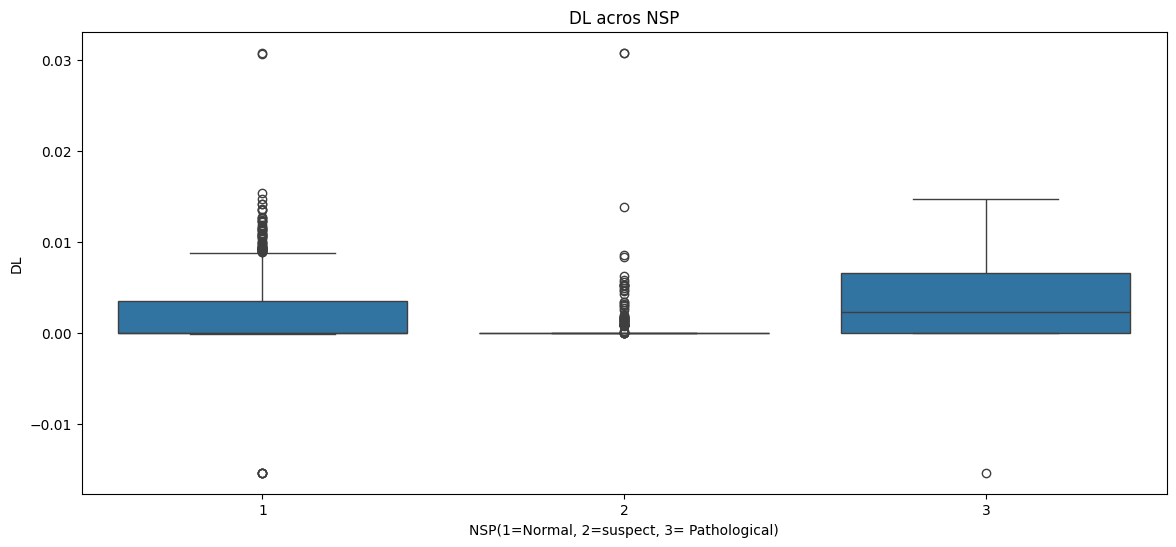

In [85]:
plt.figure(figsize=(14,6))
sns.boxplot(x='NSP',y='DL',data=df)
plt.title('DL acros NSP')
plt.xlabel('NSP(1=Normal, 2=suspect, 3= Pathological)')
plt.ylabel('DL')
plt.show()

pathological cases shoes more prolong decelerations, normal classes are tightly clustered arround 0.

# Insights

Pattern recognition revealed some differences in fetal heart rate across NSP classes. Normal fetuses exhibit higher accelerations and Mean variablity while pathological ones higher abnormal variability and increased decelerations. these conditions are linked to loss in heart rate controll and instability.

# Conclusion

we identified meaningfull patterns in Cardiotocographihc features and understood their realtions with respect to NSP classes. we performed exploratory data analysis to undestand these trends and prepare our data for model training. 

key findings:
The analysis shows that the deterioration in fetal conditions is accociated with  loss of adaptive heart rate control. these can be interpreted from reduced abnormal variability ,increased variability and reduced acceleration rates across the NSP classes. Not all classes changes over time linearly,could be interpreted via multivariate analysis rather than relying on single features.

Overall, the findings can be uncovered via successfull exploratory analysis which can uncover patterns in medical data.